<a href="https://colab.research.google.com/github/DM2003/DEEP-LEARNING-PROJECTS/blob/main/MNIST_DIGIT_CLASSIFICATION_WITH_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 # cv2 comes from OpenCV library (CV => Computer Vision) and it's helpful in image processing tasks
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
# Loading the MNIST data from keras.datasets
# MNIST dataset is an already processed dataset, so we don't have to perform any image processing or train test splitting on this one.
# It is already subdivided into 4 arrays in the form (X_train, Y_train), (X_test, Y_test), so we have to just use the function mnist.load_data() on this one.
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
# Shape of the 4 numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


1. X_train => It has 60,000 images and each image has a dimension of 28 by 28 and each image is a grayscale image

2. X_test => It has 10,000 images and each image has a dimension of 28 by 28 and each image is a grayscale image

3. Y_train => Represents the label of X_train. Suppose we feed a number 3 to our system; then that will be converted into a numpy array and stored in X_train and the original number (3) will be stored in Y_train

4. Y_test => Corresponding labels for all test images of X_test

5. We see that all the images have a common dimension in the dataset. If it hadn't been there, we have to resize all the images to a common dimension.

In [5]:
# printing the 9th image from X_train (Remember Python indexing starts from 0)
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

It is in form of numpy array

In [6]:
print(X_train[10].shape)

(28, 28)


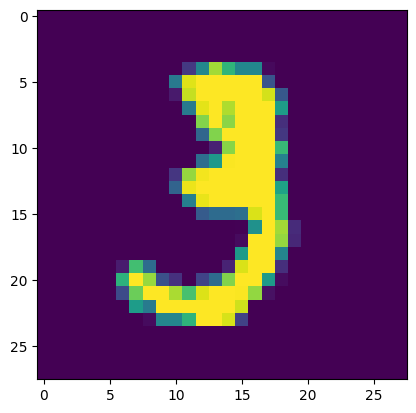

3


In [7]:
# Displaying the image from numpy array
plt.imshow(X_train[10])
plt.show()

# Print the corrresponding label
print(Y_train[10])

In [8]:
# Unique values in Y_train
print(np.unique(Y_train))

# Unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [9]:
# Normalization (scaling the values)
# We know in each of the numpy array for each of the values from 0 to 9, the intensity values range from 0 to 255 for grayscale images.
# We will try to reduce it to a range from 0 to 1
X_train = X_train/255
X_test = X_test/255

In [10]:
# Printing the 9th image again
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Thus, we can see our values have been standardized

In [11]:
# Building the neural network
# Setting up layers of neural network
model = keras.Sequential([
                         keras.layers.Flatten(input_shape = (28,28)),
                         keras.layers.Dense(50, activation = 'relu'),
                         keras.layers.Dense(50, activation = 'relu'),
                         keras.layers.Dense(10, activation = 'sigmoid') # Here we have chosen 10, since it is the output layer and we have values ranging from 0 to 9 in our dataset that we need to identify
])

In [12]:
# Compiling the neural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
# Training our neural network
model.fit(X_train, Y_train, epochs = 12)

Epoch 1/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3067 - accuracy: 0.9113
Epoch 2/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1435 - accuracy: 0.9575
Epoch 3/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1067 - accuracy: 0.9674
Epoch 4/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0861 - accuracy: 0.9734
Epoch 5/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0703 - accuracy: 0.9773
Epoch 6/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0593 - accuracy: 0.9810
Epoch 7/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0518 - accuracy: 0.9835
Epoch 8/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0462 - accuracy: 0.9849
Epoch 9/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0412 - accuracy: 0.9867
Epoch 10/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0

Therefore, training data accuracy is 99.55 %

In [14]:
# Accuracy on test data
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 0.9721
0.972100019454956


Thus, it is 97 percent accurate on test data

In [15]:
print(X_test.shape)

(10000, 28, 28)


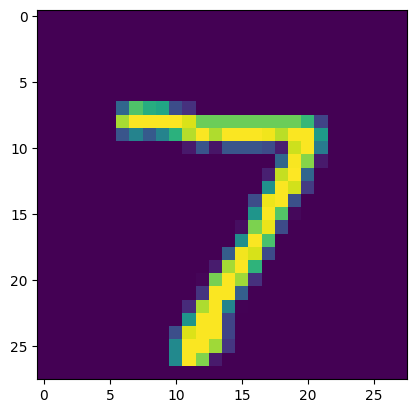

In [16]:
# First data point in X_test
plt.imshow(X_test[0])
plt.show()

In [17]:
# Checking if it's true or not by comparing with the true value
print(Y_test[0])

7


Thus, the value obtained is true

In [18]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


It will predict the labels of all 10,000 images which we have under X_test and store them in a variable called as Y_pred.

In [19]:
print(Y_pred.shape)

(10000, 10)


Now, we will understand what this 10 indicates

In [20]:
print(Y_pred[0])

[1.13909342e-03 1.13196954e-01 5.26475489e-01 9.94053900e-01
 3.43703432e-05 1.87907123e-03 1.45110410e-10 9.99999762e-01
 6.40390348e-03 4.98033911e-01]


Clearly we can see we have 10 values for the first prediction made by Y_pred.  
 1. 6.0805047e-05 => Represents the probability of the prediction being 0
 2. 1.7490890e-02 => Represents the probability of the prediction being 1
 3. 1.3838844e-01 =>  Represents the probability of the prediction being 2
 and so on till 9

In [21]:
# Converting the prediction probabilities to class label for first point
label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [22]:
# Converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 3, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Thus Y_test was our true labels and Y_pred_labels are our predicted labels

BUILDING THE CONFUSION MATRIX

In [23]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels) # Remember to put it in order inside the brackets. First we will put the true labels and then the predicted ones

In [24]:
print(conf_mat)

tf.Tensor(
[[ 972    0    0    4    0    2    0    0    1    1]
 [   0 1123    3    1    0    1    1    3    3    0]
 [   4    0  999    8    3    0    2    9    7    0]
 [   1    0    3  995    0    2    1    6    2    0]
 [   0    0    2    2  958    1    4    6    2    7]
 [   2    0    0   27    2  853    3    1    3    1]
 [  11    2    1    2    8    7  921    0    6    0]
 [   1    2    8    3    1    0    0 1001    1   11]
 [   5    1    3   16    5    7    1    4  928    4]
 [   4    2    0    7   11    5    0    6    5  969]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

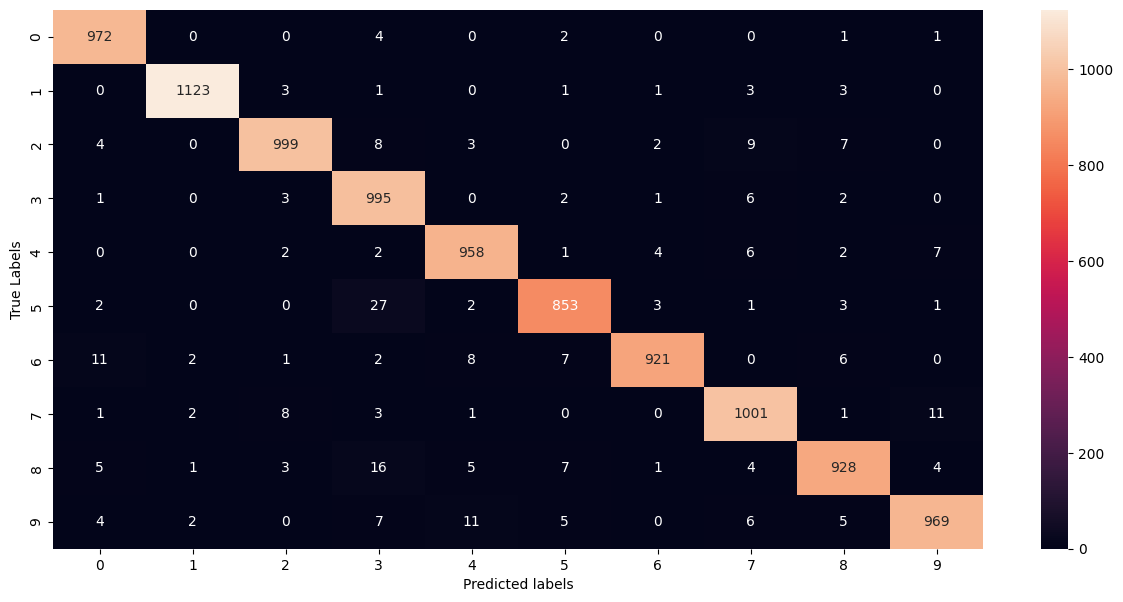

In [25]:
# Now, we will create a heatmap
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cbar = 'Blues') # Here 'd' in fmt denotes integer values
plt.ylabel('True Labels')
plt.xlabel('Predicted labels')


BUILDING A PREDICTIVE SYSTEM

In [26]:
input_image_path = '/content/MNIST_3.png' # It's in a png format. But our model has been trained on numpy array format. Hence, we will change it's formatting using cv2.imread()
input_image = cv2.imread(input_image_path)

In [27]:
type(input_image)

numpy.ndarray

Thus we can see it has been changed from png to numpy array

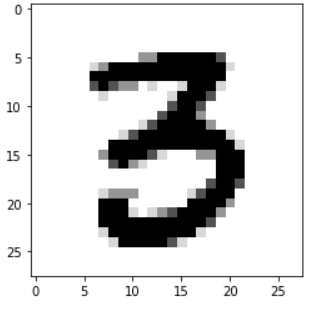

In [28]:
cv2_imshow(input_image)

In [29]:
input_image.shape

(309, 335, 3)

Thus, although we can see it as a grayscale image, it has been encoded in a RGB format. Hence, it's always better to check the image before feeding it to a predictive system

Thus, we have to convert this RGB image into grayscale image and resize it

In [30]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [31]:
# Checking the shape again
grayscale.shape

(309, 335)

We have trained our model on 28 by 28 dimension images but here we have dimensions set to 309 and 335. So we will have to resize it.

In [32]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [33]:
input_image_resize.shape

(28, 28)

Thus our image has been finally transformed well enough to be fed on predictive system

In [34]:
cv2_imshow(input_image_resize)

In [35]:
# Scaling all the values
input_image_resize = input_image_resize/255

In [36]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])
# Here we are basically telling the model that we want to reshape it for only 1 image which is in input_image_resize and the dimension of that image is 28 by 28.

In [37]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 54ms/step
[[2.8155124e-16 9.9979967e-01 9.9999994e-01 1.0000000e+00 0.0000000e+00
  1.0000000e+00 1.5395764e-05 4.5142618e-01 2.2205213e-13 1.0540893e-15]]


In [39]:
input_prediction_label = np.argmax(input_prediction)
print(input_prediction_label)

3


Enter the image path/content/MNIST_3.png


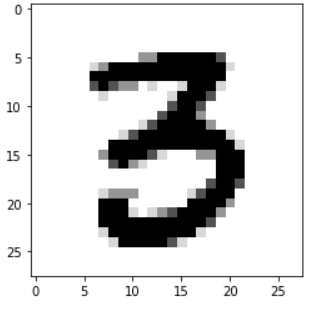

1/1 [==============================] - 0s 21ms/step
The handwritten digit is recognized by neural network as: 3


In [41]:
# Building a predictive system from users perspective (We will basically combine all the steps)
input_image_path = input("Enter the image path")
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)
input_prediction_label = np.argmax(input_prediction)
print("The handwritten digit is recognized by neural network as:",input_prediction_label)